<a href="https://colab.research.google.com/github/mtwatso2-eng/ANS128/blob/main/Lab5_2_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Simple linear regression

Regression analysis is a statistical methodology to
 - (i) describe the relationship between a response variable ($\mathbf{y}$) and a set of predictor variables ($\mathbf{x}$) and to
 - (ii) predict the values of the response variable based on those of the predictor variables.

* Simple linear regression: only one $\mathbf{x}$ variable.
* Multiple linear regression: more than one $\mathbf{x}$ variables.

## 2.1 Model equation





Given a vector of response variable $\mathbf{y}$ and a vector of predictor variable $\mathbf{x}$, the formula for a simple linear regression is:

$$ \mathbf{y} = \mathbf{1}\beta_0 + \mathbf{x}\beta_1  + \boldsymbol{\epsilon} $$


### Model assumptions
- $\epsilon_i$ are uncorrelated, zero-mean, equal-variance random variables:

$$ E(\epsilon_i) = 0, Var(\epsilon_i) = \sigma^2, i = 1,...,n$$
$$Cov(\epsilon_i, \epsilon_j) = 0, 1 \leq i \neq j \leq n$$


### Properties of $y_i$
Given $x_i$, the distributions of the responses $y_i$ have the following properties:
* The response $y_i$ is the sum of two terms:
  * The mean of $y_i$: $E(y_i) = \beta_0 + \beta_1 x_i$.
 * The random error $\epsilon_i$, which has zero-mean.

* $\epsilon_i$ have constant variance $\Rightarrow$ $y_i$ have the same constant variance (regardless of the values of $x_i$: $Var(y_i) = \sigma_2$, $i = 1,...,n$).
* $\epsilon_i$ are uncorrelated $\Rightarrow$ $y_i$ are uncorrelated: $Cov(y_i, y_j) = 0$, $1 \leq i \neq j \leq n$.

### Unknown parameters
- $\beta_0$ is the regression intercept (the value of $E(y_i)$ when $x_i=0$)
- $\beta_1$ is the regression slope (the change in $E(y_i)$ per unit change of $x_i$)
- $\sigma^2$ is the error variance

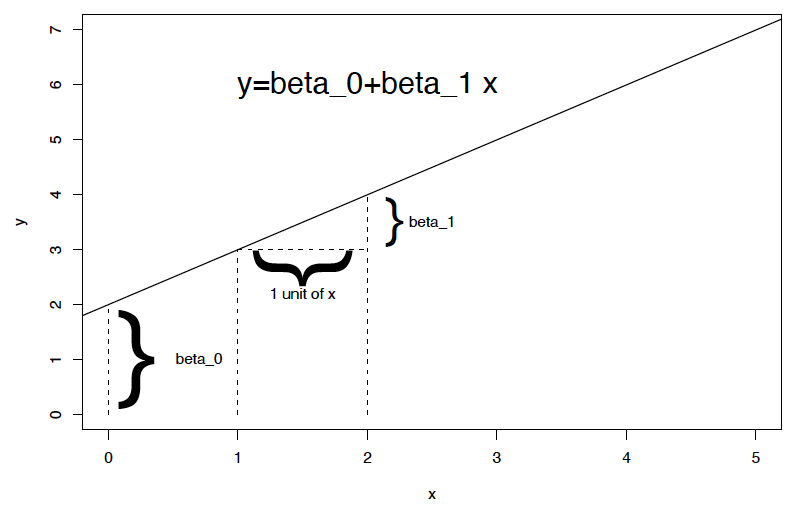

## 2.2 Least Squares Estimators

For a given line: $\beta_0 + \beta_1 \mathbf{x}$, the sum of squared vertical deviations of the observations from the corresponding points on the line is:
$$
Q(\beta_0, \beta_1) =\sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_i))^2 $$

* $\beta_0 + \beta_1 x_i$ is the point on the line with the
same x-coordinate as the ith observation point $x_i$.
* The least squares (LS) principle is to fit the observed data by minimizing the sum of squared vertical deviations.
LS line has the smallest sum of squared vertical deviations
among all straight lines.
* LS estimators of $\beta_0$, $\beta_1$ are the pair of values $\beta_0$, $\beta_1$ that minimize the function $Q(\beta_0, \beta_1)$. This leads to the normal equations.

visualization for simple linear regression: https://setosa.io/ev/ordinary-least-squares-regression/

## 2.3 Example

Suppose we have a dataset containing information about the amount of fertilizer used and the yield of crops.



### Loading data

In [ ]:
# Set seed for reproducibility
set.seed(0)

# data simulation
n = 100  #number of observations
b0 = 10 #y-intercept (b0)
b1 = 5  #Slope (b1)


x = runif(n, 0, 20)   # Fertilizer_Amount ranging from 0 to 20
e = rnorm(n, mean = 0, sd = 10)  # Generate normally distributed noise, mean=0, standard deviation=5
y = b0 + b1 * x + e # Calculate Crop_Yield (y)

# Create a DataFrame to hold the simulated data
df = data.frame(Fertilizer_Amount = x, Crop_Yield = y)
head(df) # Display the first a few rows of the DataFrame

,Fertilizer_Amount,Crop_Yield
,<dbl>,<dbl>
1,17.933944,102.33109
2,5.310173,32.78384
3,7.442478,71.62604
4,11.457067,59.33195
5,18.164156,100.27200
6,4.033639,32.66961


### Exploratory data analysis

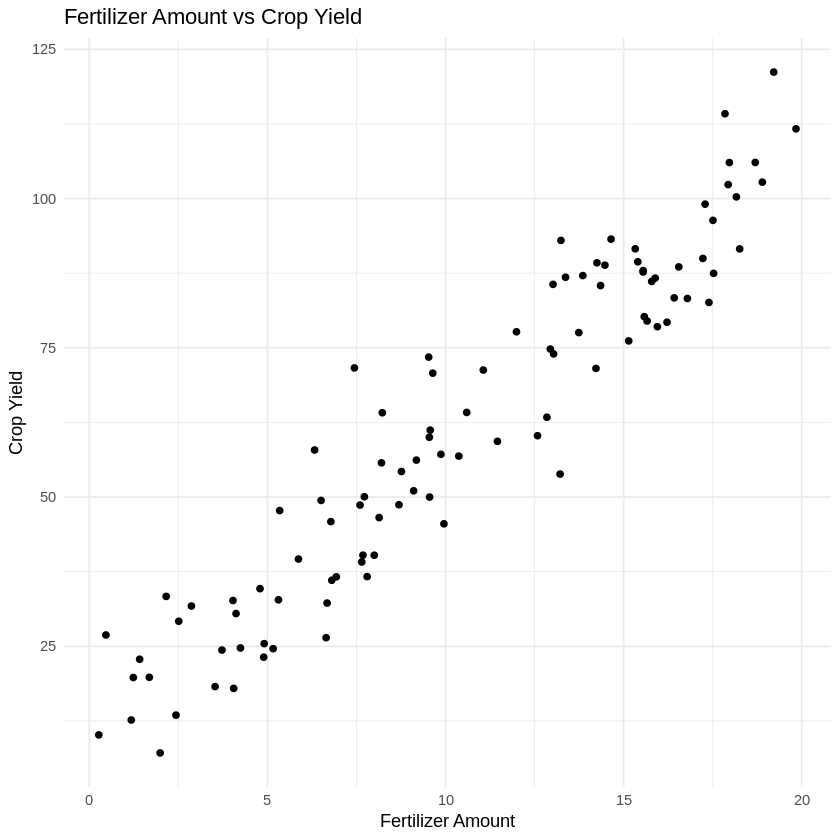

In [ ]:
library(ggplot2)

# Create a scatter plot
ggplot(df, aes(x = Fertilizer_Amount, y = Crop_Yield)) +
  geom_point() +  # Scatter plot points
  labs(title = "Fertilizer Amount vs Crop Yield",
       x = "Fertilizer Amount",
       y = "Crop Yield") +
  theme_minimal()  # Set a minimal theme for the plot

### Fitting a simple linear regression model

In [ ]:
# Split the data into training and testing sets
set.seed(1)
train_index = sample(1:nrow(df), size = 0.7 * nrow(df))  # 70% for training
df_train = df[train_index,]
df_test = df[-train_index,]

# Prepare test set features and target
X_test = df_test$Fertilizer_Amount
y_test = df_test$Crop_Yield

# Create the linear regression model
model = lm(Crop_Yield ~ Fertilizer_Amount, data = df_train)

# Summary of the model (to get coefficients and intercept)
summary(model)


Call:
lm(formula = Crop_Yield ~ Fertilizer_Amount, data = df_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.4691  -7.7615   0.6175   5.8221  16.8870 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)         8.0979     2.1149   3.829 0.000283 ***
Fertilizer_Amount   5.0856     0.1856  27.398  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.152 on 68 degrees of freedom
Multiple R-squared:  0.9169,	Adjusted R-squared:  0.9157 
F-statistic: 750.7 on 1 and 68 DF,  p-value: < 2.2e-16


In [ ]:
b0=coef(model)[1]
b1=coef(model)[2]
cat("Intercept: ", b0, "\n")
cat("Coefficient for Fertilizer Amount: ", b1, "\n")

Intercept:  8.097931 
Coefficient for Fertilizer Amount:  5.085647 


In [ ]:
# Make predictions on the test set
y_pred = predict(model, newdata = data.frame(Fertilizer_Amount = X_test))
y_pred

1         2         3         4         5         6         7         8 
 45.94774  66.36453 100.47441 104.18362  75.30961  72.08697  29.04821  47.16625 
        9        10        11        12        13        14        15        16 
 86.40076 108.98761  35.27773  47.37073  96.55674  42.71583  49.92986  61.97726 
       17        18        19        20        21        22        23        24 
 56.67802  95.69407  15.28690  40.26685  75.43241  49.47782  37.96119  96.01243 
       25        26        27        28        29        30 
105.80521  85.10349  80.42816  20.47557  14.09232  97.22584

### Mean Squared Error

In [ ]:
# Compare the predicted values to the actual values
# You can use Mean Squared Error (MSE) or any other metric as needed
mse  = mean((y_pred - y_test)^2)
rmse = sqrt(mse)  # Root Mean Squared Error
cat('Mean Squared Error (MSE):', mse, '\n')  # Evaluate the model using Mean Squared Error
cat('Root Mean Squared Error:', rmse, '\n')

Mean Squared Error (MSE): 110.0083 
Root Mean Squared Error: 10.48848 


### Plotting the regression line and the test data points

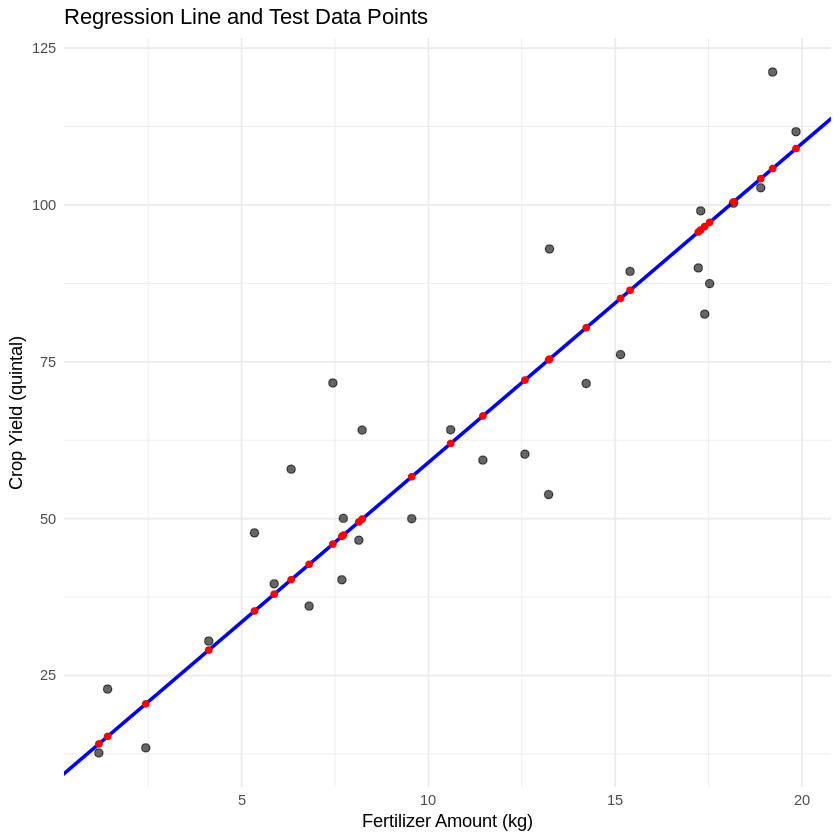

In [ ]:
# Create a data frame for the test set and predictions
plot_data = data.frame(Fertilizer_Amount = X_test, Actual_Yield = y_test, Predicted_Yield = y_pred)

# Plot the regression line and test data points
ggplot(plot_data, aes(x = Fertilizer_Amount)) +
  geom_abline(intercept = b0, slope = b1, color = "blue", size = 1) + # Regression line
  geom_point(aes(y = Actual_Yield), color = "black", size = 2, alpha = 0.6) +  # Scatter plot for actual values
  geom_point(aes(y = Predicted_Yield), color = "red", size = 1.5) +  # Scatter plot for predicted values
  labs(title = "Regression Line and Test Data Points",
       x = "Fertilizer Amount (kg)",
       y = "Crop Yield (quintal)") +
  theme_minimal()

# 3. Multiple linear regression

## 3.1 Model equation

In multiple linear regression, there are more than one $\mathbf{x}$ variables.

For $i = 1, ..., n$:

$$ y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + ... + \beta_{p-1} x_{i,p-1} + \epsilon_i $$

Where:
- $y_i$: value of the response variable $\mathbf{y}$ in the $i$th case.
- $x_{i1}$, ..., $x_{i,p-1}$: values of the variables $\mathbf{x}_1, ..., \mathbf{x}_{p-1}$ in the $i$th case.
- $\beta_0$, $\beta_1$, ..., $\beta_{p-1}$: regression coefficients.
  - $p$: the number of regression coefficients.
  - In simple regression $p = 2$.
- $\epsilon_i$: error terms where $E(\epsilon_i) = 0$, $Var(\epsilon_i) = \sigma^2$, $Cov(\epsilon_i, \epsilon_j) = 0$ for $i \neq j$.
- mean response:
$$ E(\mathbf{y}) = \beta_0 + \beta_1 \mathbf{x}_1 + \beta_2 \mathbf{x}_2 + ... + \beta_{p-1} \mathbf{x}_{p-1}$$


## 3.2 Model equation (in matrix form)

$$ \mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\epsilon} $$

where the design matrix $\mathbf{X}$ and the coefficients vector $\boldsymbol{\beta}$ are represented as:

$$ X_{n \times p} = \begin{bmatrix} 1 & X_{11} & X_{12} & ... & X_{1,p-1} \\
1 & X_{21} & X_{22} & ... & X_{2,p-1} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & X_{n1} & X_{n2} & ... & X_{n,p-1} \end{bmatrix} $$

$$ \boldsymbol{\beta}_{p \times 1} = \begin{bmatrix} \beta_0 \\ \beta_1 \\ \vdots \\ \beta_{p-1} \end{bmatrix} $$

Each row of $\mathbf{X}$ corresponds to a case and each column of $\mathbf{X}$ corresponds to the $n$ observations of an $\mathbf{x}$ variable.


### Model assumptions


$$ E(\boldsymbol{\epsilon}) = \mathbf{0} $$

$$ Var(\boldsymbol{\epsilon}) = \sigma^2 \mathbf{I}_n $$



### Properties of $\mathbf{y}$

- $ E(\mathbf{y}) = E(\mathbf{X} \boldsymbol{\beta} + \boldsymbol{\epsilon}) = E(\mathbf{X} \boldsymbol{\beta})+ E( \boldsymbol{\epsilon}) = E(\mathbf{X} \boldsymbol{\beta})=\mathbf{X} \boldsymbol{\beta} $

-  $Var(\mathbf{y}) = var(\mathbf{X} \boldsymbol{\beta} + \boldsymbol{\epsilon})=var(\boldsymbol{\epsilon})=\sigma^2 \mathbf{I}_n $

- Under the Normal error model (linear regression model + Normality assumption on error terms), $\mathbf{y}$ is a vector of independent normal random variables.

## 3.3 Least Squares (LS) Estimators




The least squares criterion is defined as:

$$ Q(\boldsymbol{\beta}) = \sum_{i=1}^{n} (y_i - \beta_0 - \beta_1 x_{i1} - ... - \beta_{p-1} x_{i,p-1})^2 \\
= (\mathbf{y} - \mathbf{X}\boldsymbol{\beta})^T (\mathbf{y} - \mathbf{X}\boldsymbol{\beta}) $$

Where $ \boldsymbol{\beta}_{p \times 1} = \begin{bmatrix} \beta_0 \\ \beta_1 \\ \vdots \\ \beta_{p-1} \end{bmatrix} $

Expanding this expression, we get:
$ Q(\boldsymbol{\beta}) = \mathbf{y}^T\mathbf{y} - \mathbf{y}^T\mathbf{X}\boldsymbol{\beta} - \boldsymbol{\beta}^T\mathbf{X}^T\mathbf{y} + \boldsymbol{\beta}^T\mathbf{X}^T\mathbf{X}\boldsymbol{\beta} $

The gradient of $ Q $ with respect to $\boldsymbol{\beta} $ is a vector whose $ j $-th component is the partial derivative of $Q $ with respect to $ \beta_j$:
$$ \nabla Q(\boldsymbol{\beta}) = 2\mathbf{X}^T\mathbf{X}\boldsymbol{\beta} - 2\mathbf{X}^T\mathbf{y} $$



Set the gradient to zero, leading to the **normal equation**:

$$ \mathbf{X}^T \mathbf{X} \boldsymbol{\beta} = \mathbf{X}^T \mathbf{y} $$

The LS estimators are solutions of the normal equation:

$$ \boldsymbol{\hat{\beta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$$

Where:
$$ \boldsymbol{\hat{\beta}}_{p \times 1} = \begin{bmatrix} \hat{\beta_0} \\ \hat{\beta_1} \\ \vdots \\ \hat{\beta}_{p-1}  \end{bmatrix} $$

- $\boldsymbol{\hat{\beta}}$ is an unbiased estimator for $\boldsymbol{\beta}$:
$ E(\boldsymbol{\hat{\beta}}) = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T E(\mathbf{y}) = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{X} \boldsymbol{\beta} = \boldsymbol{\beta}$

- Variance-covariance matrix of $\boldsymbol{\hat{\beta}}$:
$Var(\boldsymbol{\hat{\beta}}) = \sigma^2 (\mathbf{X}^T \mathbf{X})^{-1}$

Note: here we assume $\mathbf{X}^T \mathbf{X}$ is of full rank $p$ (i.e., $p < n$).


## 3.4 Example

### Loading data

In [ ]:
set.seed(0)  # Set a random seed for reproducibility

# Number of data points
n = 500

# Generate synthetic data
rainfall = runif(n, 100, 200)  # Rainfall in mm
crop_type = sample(c('Wheat', 'Rice'), n, replace = TRUE)  # Crop Type
soil_type = sample(c('Sandy', 'Loamy', 'Clayey'), n, replace = TRUE)  # Soil Type with three categories

# Assume a hypothetical true relationship between the variables and the crop yield
# For simplicity, let's say the relationship is linear with some noise
noise = rnorm(n, 0, 10)  # Some noise
crop_yield = 0.5 * rainfall + 20 * (crop_type == 'Wheat') + 10 * (soil_type == 'Loamy') + 5 * (soil_type == 'Clayey') + noise

# Create a DataFrame
df = data.frame(
  Rainfall = rainfall,
  Crop_Type = crop_type,
  Soil_Type = soil_type,
  Crop_Yield = crop_yield
)

# View the first few rows of the data frame
head(df)


,Rainfall,Crop_Type,Soil_Type,Crop_Yield
,<dbl>,<chr>,<chr>,<dbl>
1,189.6697,Rice,Clayey,122.19809
2,126.5509,Wheat,Clayey,91.29808
3,137.2124,Wheat,Clayey,83.18113
4,157.2853,Wheat,Sandy,88.80725
5,190.8208,Wheat,Clayey,140.46758
6,120.1682,Wheat,Sandy,59.37838


### Encode categorical variables

In [ ]:
# Load necessary library
library(dplyr)

# Encode categorical variables using dummy variables (one-hot encoding)
df_encoded <- df %>%
  mutate(
    Crop_Type_Wheat = ifelse(Crop_Type == 'Wheat', 1, 0),
    Soil_Type_Loamy = ifelse(Soil_Type == 'Loamy', 1, 0),
    Soil_Type_Clayey = ifelse(Soil_Type == 'Clayey', 1, 0)
  ) %>%
  select(-Crop_Type, -Soil_Type)  # Drop the original columns

# View the first few rows of the encoded data frame
head(df_encoded)

,Rainfall,Crop_Yield,Crop_Type_Wheat,Soil_Type_Loamy,Soil_Type_Clayey
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,189.6697,122.19809,0,0,1
2,126.5509,91.29808,1,0,1
3,137.2124,83.18113,1,0,1
4,157.2853,88.80725,1,0,0
5,190.8208,140.46758,1,0,1
6,120.1682,59.37838,1,0,0


In [ ]:
# Set random seed for reproducibility
set.seed(0)
train_index = sample(1:nrow(df), size = 0.7 * nrow(df))  # 70% for training
df_train = df_encoded[train_index,]
df_test = df_encoded[-train_index,]
x_train = df_train[, -which(names(df_test) == "Crop_Yield")]
y_train = df_train$Crop_Yield
y_test = df_test$Crop_Yield
x_test = df_test[, -which(names(df_test) == "Crop_Yield")]
head(x_test)

,Rainfall,Crop_Type_Wheat,Soil_Type_Loamy,Soil_Type_Clayey
,<dbl>,<dbl>,<dbl>,<dbl>
5,190.8208,1,0,1
6,120.1682,1,0,0
7,189.8390,1,1,0
8,194.4675,1,0,0
9,166.0798,1,1,0
10,162.9114,0,1,0


In [ ]:
# Check the dimensions of the training and test sets
dim(df_train)
dim(x_test)

[1] 350   5

[1] 150   4

### Fit a multiple linear regression model

In [ ]:
model2 = lm(Crop_Yield ~ ., data = df_train)  # Fit the model to the training data
summary(model2)  # Summarize the model


Call:
lm(formula = Crop_Yield ~ ., data = df_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.390  -7.785  -0.266   6.825  35.465 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -1.22601    3.19239  -0.384 0.701184    
Rainfall          0.50272    0.02044  24.600  < 2e-16 ***
Crop_Type_Wheat  21.61613    1.15147  18.773  < 2e-16 ***
Soil_Type_Loamy  10.06200    1.42429   7.065 8.95e-12 ***
Soil_Type_Clayey  4.82757    1.39967   3.449 0.000632 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.75 on 345 degrees of freedom
Multiple R-squared:  0.7518,	Adjusted R-squared:  0.7489 
F-statistic: 261.3 on 4 and 345 DF,  p-value: < 2.2e-16


In [ ]:
print(coef(model2))

     (Intercept)         Rainfall  Crop_Type_Wheat  Soil_Type_Loamy 
      -1.2260097        0.5027188       21.6161330       10.0619986 
Soil_Type_Clayey 
       4.8275731 


In [ ]:
# Predict the crop yield on the test set
y_pred = predict(model2, newdata = x_test)

### Mean Squared Error (MSE)

In [ ]:
mse = mean((y_test - y_pred)^2) # Evaluate the model using Mean Squared Error
mse

[1] 90.76493

### Hypothesis testing

#### P-value (using a package)

below we will calcualte p-value using package statsmodels:

In [ ]:
summary(model2)


Call:
lm(formula = Crop_Yield ~ ., data = df_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.390  -7.785  -0.266   6.825  35.465 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -1.22601    3.19239  -0.384 0.701184    
Rainfall          0.50272    0.02044  24.600  < 2e-16 ***
Crop_Type_Wheat  21.61613    1.15147  18.773  < 2e-16 ***
Soil_Type_Loamy  10.06200    1.42429   7.065 8.95e-12 ***
Soil_Type_Clayey  4.82757    1.39967   3.449 0.000632 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.75 on 345 degrees of freedom
Multiple R-squared:  0.7518,	Adjusted R-squared:  0.7489 
F-statistic: 261.3 on 4 and 345 DF,  p-value: < 2.2e-16


#### P-value (by-hand)

Below we will calculate p-values based on the estimated parameters.

**MSE**:
 - $$MSE = \frac{SSE}{n-p}$$  
 - $$E(MSE)=\sigma^2_e$$

**LS estimators**:
 - $$ \boldsymbol{\hat{\beta}}_{p \times 1} = \begin{bmatrix} \hat{\beta_0} \\ \hat{\beta_1} \\ \vdots \\ \hat{\beta}_{p-1}  \end{bmatrix} $$

 - $ E(\boldsymbol{\hat{\beta}}) = \boldsymbol{\beta}$

 - $\sigma^2_{\boldsymbol{\hat{\beta}}} = \sigma_e^2 *(\mathbf{X}^T \mathbf{X})^{-1}$
 - the standard error of $\hat{\beta_k}$ (i.e., $s_{\hat{\beta}_k}$) is the positive square-root of the corresponding diagonal element of $MSE*(\mathbf{X}^T \mathbf{X})^{-1}$.

**Studentized pivotal quantity**:
 - $\frac{\hat{\beta_k}- \beta_k}{s_{\hat{\beta}_k}} \sim t_{(n - p)}$.


**$(1-\alpha)-$Confidence Interval for $\beta_k$**:
 -  $\hat{\beta_k} \pm t_{(1 - \frac{\alpha}{2}; n - p)} s_{\hat{\beta}_k}$

**T-Statistic:**
 - $T^* = \frac{\hat{\beta_k} - \beta_k^0}{s_{\hat{\beta}_k}} \sim t_{(n-p)}$


**Two-sided T-test:**
 - $H_0$: $\beta_k = \beta_{k}^0$ vs $H_a$: $\beta_k \neq \beta_{k}^0$
 - the decision rule at level $\alpha$ is to reject $H_0$ if and only if $|T^*| > t_\left(1 - \frac{\alpha}{2}; n - p \right)$.


In [ ]:
# Calculate residuals
residuals = model2$residuals # == df_train$Crop_Yield - predict(model2, newdata=df_train)

# Compute the standard error of the regression
SER = sqrt(sum(residuals^2) / (nrow(df_train) - length(coef(model2))))  # sqrt(MSE)

# Add a constant (intercept) to X_train for matrix calculations
X_with_intercept = as.matrix(cbind(1,x_train) ) # Adding a column of 1s for the intercept

# Calculate the standard error for each coefficient
var_beta = SER^2 * diag(solve(t(X_with_intercept) %*% X_with_intercept))  # Var of beta_hat = MSE * inv(X'X)
SE_beta = sqrt(var_beta)  # Standard errors of beta_hat

# Calculate t-statistics
t_stats_with_intercept = coef(model2) / SE_beta  # H0: beta = 0

# Determine p-values for the t-statistics
p_values_with_intercept = 2 * (1 - pt(abs(t_stats_with_intercept), df = nrow(df_train) - length(coef(model2))))

# Combine results into a DataFrame for better visualization
results_df_with_intercept = data.frame(
  Coefficient = coef(model2),
  `Standard Error` = SE_beta,
  `t-statistic` = t_stats_with_intercept,
  `p-value` = p_values_with_intercept
)

print(results_df_with_intercept)

                 Coefficient Standard.Error t.statistic      p.value
(Intercept)       -1.2260097     3.19238874  -0.3840415 7.011843e-01
Rainfall           0.5027188     0.02043583  24.5998718 0.000000e+00
Crop_Type_Wheat   21.6161330     1.15146748  18.7726822 0.000000e+00
Soil_Type_Loamy   10.0619986     1.42429197   7.0645618 8.950618e-12
Soil_Type_Clayey   4.8275731     1.39966858   3.4490830 6.321699e-04


### Solve normal equation by-hand

In [ ]:
# Calculate the coefficients using the normal equation inv(X'X)*(X'y)
beta = solve(t(X_with_intercept) %*% X_with_intercept) %*% t(X_with_intercept) %*% y_train

# The first element in beta will be the intercept, and the rest will be the coefficients (slopes) for the independent variables.
beta

1,-1.2260097
Rainfall,0.5027188
Crop_Type_Wheat,21.6161330
Soil_Type_Loamy,10.0619986
Soil_Type_Clayey,4.8275731


#### left-hand side of normal equation

In [ ]:
# Take the first few rows of the independent variables matrix X (for demonstration purposes)
X_small = as.matrix(head(x_train, 10))
X_small

,Rainfall,Crop_Type_Wheat,Soil_Type_Loamy,Soil_Type_Clayey
398,165.9821,0,0,1
324,140.5690,0,1,0
167,141.3124,1,0,1
129,120.7545,0,0,0
418,149.4655,1,0,1
471,169.0257,0,0,1
299,111.8903,1,1,0
270,162.0410,1,0,0
466,126.0930,1,0,1
187,118.9194,1,1,0


In [ ]:
# Calculate X^T*X
XTX = t(X_small) %*% X_small
XTX

,Rainfall,Crop_Type_Wheat,Soil_Type_Loamy,Soil_Type_Clayey
Rainfall,201588.1118,809.7215,371.3786,751.8786
Crop_Type_Wheat,809.7215,6.0000,2.0000,3.0000
Soil_Type_Loamy,371.3786,2.0000,3.0000,0.0000
Soil_Type_Clayey,751.8786,3.0000,0.0000,5.0000


https://lmmonboard.ucdavis.edu/myapp




Reference:
1. STAT 510 Lecture Notes, Iowa State University
2. STAT 206 Lecture Notes, University of California, Davis
3. SISG - Introduction to Mixed Model, Guilherme J. M. Rosa, University of Wisconsin-Madison
4. lmmonboard: https://lmmonboard.ucdavis.edu/myapp, Hao Cheng, Chunpeng James Chen

Contributors:
* Tianjing Zhao (tzhao9@unl.edu), University of Nebraska-Lincoln
* Brian Rice (brice7@unl.edu), University of Nebraska-Lincoln
* Hao Cheng (qtlcheng@ucdavis.edu), University of California, Davis
* GPT-4